In [1]:
import mikeio
from watobs import DHIAltimetryRepository
import matplotlib.pyplot as plt
import os
api_key = os.getenv('DHI_ALTIMETRY_API_KEY')

In [7]:
df = mikeio.open("../output/Area_2014_2018.dfsu")
area_box = [df.geometry.element_coordinates[:,0].min(),df.geometry.element_coordinates[:,1].min(),
            df.geometry.element_coordinates[:,0].max(),df.geometry.element_coordinates[:,1].max()]
area_str = f"bbox={area_box[0]},{area_box[1]},{area_box[2]},{area_box[3]}"


start = "2014-01-01"
end = "2023-01-01"

In [8]:
# Set up altimetry repository
repo = DHIAltimetryRepository(api_key=api_key)
repo.get_satellites()

,long_name
short_name,
gs,Geosat
e1,ERS-1
tx,TOPEX
pn,Poseidon
e2,ERS-2
g1,GFO
j1,Jason-1
n1,Envisat
j2,Jason-2


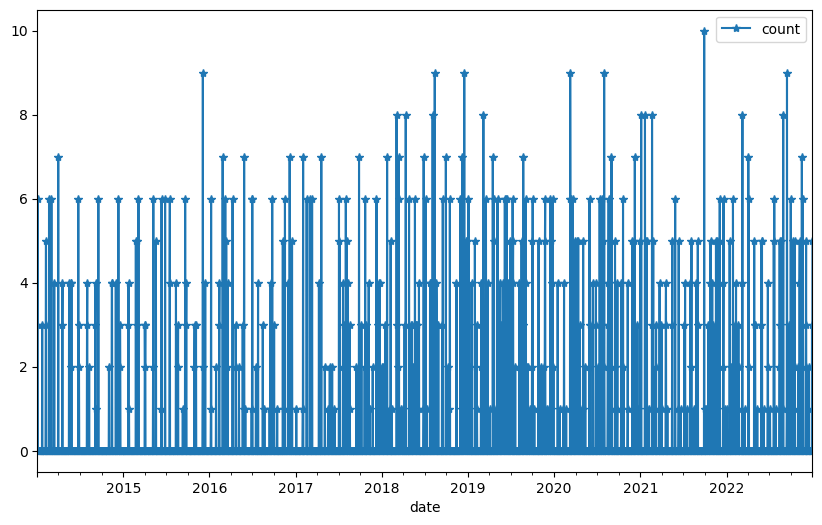

In [9]:
# Look at availability in the area and time period of interest
df = repo.get_daily_count(area=area_str, start_time=start,end_time=end)
df.plot(marker="*", figsize=(10,6));

In [10]:
# Download the data
data = repo.get_altimetry_data(area=area_str, start_time=start,end_time=end)
data.df

Succesfully retrieved 1567 records from API in 2.23 seconds


,longitude,latitude,water_level,significant_wave_height,wind_speed,distance_from_land,water_depth,satellite,quality,absolute_dynamic_topography,water_level_rms,significant_wave_height_raw,significant_wave_height_rms,wind_speed_raw,wind_speed_rads,quality_swh,quality_water_level,quality_wind_speed
datetime,,,,,,,,,,,,,,,,,,
2014-01-02 08:58:05.319,-52.938067,47.746635,0.520,2.008,NaN,8360.0,-227.62,sa,1,0.173,0.057,1.976,0.416,14.199,13.62,1,1,2
2014-01-02 08:58:06.357,-52.962685,47.807130,0.501,1.766,NaN,9680.0,-213.09,sa,1,0.152,0.040,1.731,0.253,13.976,13.40,1,1,2
2014-01-02 08:58:07.396,-52.987350,47.867621,0.514,1.656,NaN,5438.0,-129.42,sa,1,0.163,0.053,1.620,0.314,13.630,13.05,1,1,2
2014-01-03 22:14:30.007,-53.075451,47.849053,0.559,1.804,NaN,1314.0,-36.43,sa,2,0.257,0.024,1.770,0.298,31.771,19.20,2,2,2
2014-01-03 22:14:31.046,-53.100095,47.788569,0.483,2.344,NaN,3321.0,-90.69,sa,2,0.174,0.072,2.316,0.460,17.097,16.52,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 00:54:03.000,-52.938618,47.610475,NaN,7.918,13.870,1297.0,-83.10,3b,2,NaN,NaN,7.918,10.288,13.797,13.45,2,2,2
2022-12-31 00:54:04.000,-52.962325,47.668476,-0.125,0.785,4.550,2444.0,-78.97,3b,1,0.219,0.052,0.785,0.395,4.597,4.42,1,1,1
2022-12-31 00:54:05.000,-52.986077,47.726472,-0.156,0.760,5.573,8827.0,-247.19,3b,0,0.185,0.042,0.760,0.503,5.606,5.38,0,0,0


In [11]:
# Take relevant data
wl_df = data.df.loc[:,["longitude","latitude","water_level","satellite","quality_water_level"]]
wl_df.index.names = ['datetime_UTC']
wl_df

,longitude,latitude,water_level,satellite,quality_water_level
datetime_UTC,,,,,
2014-01-02 08:58:05.319,-52.938067,47.746635,0.520,sa,1
2014-01-02 08:58:06.357,-52.962685,47.807130,0.501,sa,1
2014-01-02 08:58:07.396,-52.987350,47.867621,0.514,sa,1
2014-01-03 22:14:30.007,-53.075451,47.849053,0.559,sa,2
2014-01-03 22:14:31.046,-53.100095,47.788569,0.483,sa,2
...,...,...,...,...,...
2022-12-31 00:54:03.000,-52.938618,47.610475,NaN,3b,2
2022-12-31 00:54:04.000,-52.962325,47.668476,-0.125,3b,1
2022-12-31 00:54:05.000,-52.986077,47.726472,-0.156,3b,0


In [12]:
# Filter in quality flag and distance from land (to only get water areas)
wl_df_filtered = wl_df[(data.df.loc[:,"quality_water_level"] < 2) & (data.df.loc[:,"distance_from_land"]>0.0)]
wl_df_filtered

,longitude,latitude,water_level,satellite,quality_water_level
datetime_UTC,,,,,
2014-01-02 08:58:05.319,-52.938067,47.746635,0.520,sa,1
2014-01-02 08:58:06.357,-52.962685,47.807130,0.501,sa,1
2014-01-02 08:58:07.396,-52.987350,47.867621,0.514,sa,1
2014-01-22 12:42:40.684,-52.829621,47.862452,0.352,c2,1
2014-02-06 08:58:04.340,-52.947138,47.743587,0.081,sa,1
...,...,...,...,...,...
2022-12-29 18:55:18.373,-52.852718,47.830912,0.162,c2,1
2022-12-31 00:54:04.000,-52.962325,47.668476,-0.125,3b,1
2022-12-31 00:54:05.000,-52.986077,47.726472,-0.156,3b,0


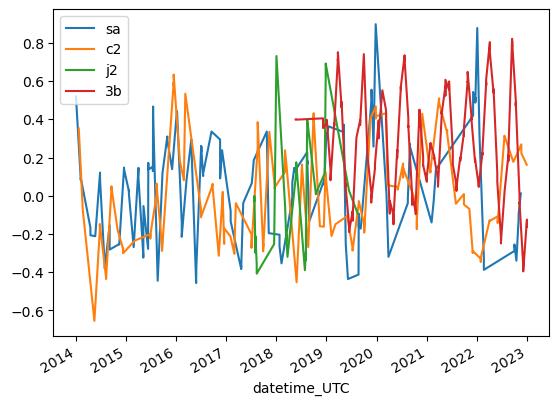

In [13]:
# Plot availability of data
for s in wl_df_filtered.satellite.unique():
    wl_df_filtered[wl_df_filtered.satellite == s].loc[:,"water_level"].plot(label=s)
plt.legend()

In [14]:
# Save data
sats=wl_df_filtered["satellite"].unique()

for sat in sats:
    df = wl_df_filtered.loc[wl_df_filtered["satellite"] == sat].drop(columns=["satellite"])
    df.to_csv(f"../observations/Altimetry_wl_{sat}.csv", date_format='%Y-%m-%dT%H:%M:%S.%f')